![alttext](logo.png)

### Nombre postulante: EDUARDO ÁLVAREZ RIVAS
### Fecha: Jueves 17 de octubre 2019
  

## 1- Importación de librerías:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"]=(10,6)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC


## 2- Importación BBDD:

In [2]:
df= pd.read_csv("caudal_extra.csv").drop('Unnamed: 0', axis=1)

In [3]:
df.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0.0,NaN
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0.0,NaN
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0.0,NaN
3,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-06-30 00:00:00+00:00,3.590,4540001,Rio Grande En Paloma 1,0.0,NaN
4,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-07-22 00:00:00+00:00,1.370,4540001,Rio Grande En Paloma 1,0.0,NaN


In [4]:
df.shape
#fila base de datos 1.411.180
# 16 columnas

(1411180, 16)

In [5]:
df.dtypes

codigo_estacion             int64
institucion                object
fuente                     object
nombre                     object
altura                      int64
latitud                   float64
longitud                  float64
codigo_cuenca               int64
nombre_sub_cuenca          object
cantidad_observaciones      int64
fecha                      object
caudal                    float64
gauge_id                    int64
gauge_name                 object
precip_promedio           float64
temp_max_promedio         float64
dtype: object

In [6]:
# Transformación variable fecha a formato fecha. 
# desagregación variable fecha
df['fecha'] = pd.to_datetime(df['fecha'], format = '%Y/%m/%d')
df['año'], df['mes'], df["semana"] = df['fecha'].dt.year, df['fecha'].dt.month,df['fecha'].dt.week

In [7]:
df.info()
# Hay variables de tipo integer, object y float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411180 entries, 0 to 1411179
Data columns (total 19 columns):
codigo_estacion           1411180 non-null int64
institucion               1411180 non-null object
fuente                    1411180 non-null object
nombre                    1411180 non-null object
altura                    1411180 non-null int64
latitud                   1411180 non-null float64
longitud                  1411180 non-null float64
codigo_cuenca             1411180 non-null int64
nombre_sub_cuenca         1411180 non-null object
cantidad_observaciones    1411180 non-null int64
fecha                     1411180 non-null datetime64[ns, UTC]
caudal                    1411180 non-null float64
gauge_id                  1411180 non-null int64
gauge_name                1411180 non-null object
precip_promedio           1383413 non-null float64
temp_max_promedio         1259617 non-null float64
año                       1411180 non-null int64
mes                      

## 2- Analiza el dataset caudal_extra.csv. ¿Qué puedes decir de los datos, distribuciones, missing,u otros? ¿Hay algo que te llame la atención? ¿Por qué hay tantos valores missing? Pensar en la manera en que se elaboró el dataset, descrito más arriba. (Entregable: texto/imágenes)

### 2.1- Valores Nan:

In [8]:
# datos perdidos por variable.
df.isnull().sum()

codigo_estacion                0
institucion                    0
fuente                         0
nombre                         0
altura                         0
latitud                        0
longitud                       0
codigo_cuenca                  0
nombre_sub_cuenca              0
cantidad_observaciones         0
fecha                          0
caudal                         0
gauge_id                       0
gauge_name                     0
precip_promedio            27767
temp_max_promedio         151563
año                            0
mes                            0
semana                         0
dtype: int64

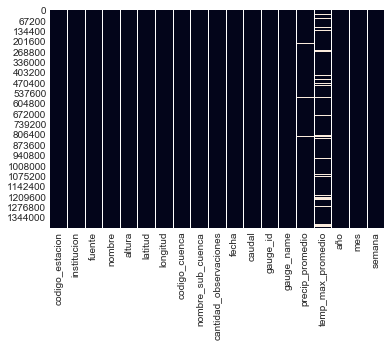

In [9]:
# valores perdidos por código estación
sns.heatmap(df.isnull(), cbar=False)

In [10]:
#Creación de función para análisis de datos perdidos
def perdidos(df,var,print_list=False):
    a=df[var].isnull().sum()
    b=len(df[var])
    print("I- Cantidad de casos perdidos:",a)
    print("II- % de casos perdidos:",a/b)
    if print_list==True:
        a=df[pd.isnull(df[var])==True]["codigo_cuenca"].values
        a= pd.DataFrame({var:a})
        print("III- % casos perdidos por cuencas:", "\n",a[var].value_counts("%"))
        b=df[pd.isnull(df[var])==True]["codigo_estacion"].values
        b= pd.DataFrame({var:b})
        print("\nIV- % casos perdidos por estación:", "\n",b[var].value_counts("%"))
        c=df[pd.isnull(df[var])==True]["año"].values
        c= pd.DataFrame({var:c})
        print("\nV- % casos perdidos por año:", "\n",c[var].value_counts("%"))
 

In [11]:
var_missing=["precip_promedio", "temp_max_promedio"]

In [12]:
# análisis variables con datos perdidos
for i in var_missing:
    print("\n",i)
    perdidos(df,i,True)


 precip_promedio
I- Cantidad de casos perdidos: 27767
II- % de casos perdidos: 0.019676440992644453
III- % casos perdidos por cuencas: 
 34     0.196132
111    0.134224
91     0.129326
71     0.108726
32     0.087370
83     0.085317
57     0.082724
113    0.057550
94     0.053913
21     0.030252
73     0.008031
43     0.007779
10     0.003601
54     0.003241
45     0.002485
122    0.002269
103    0.002197
38     0.002197
117    0.001297
12     0.001080
81     0.000252
107    0.000036
Name: precip_promedio, dtype: float64

IV- % casos perdidos por estación: 
 9123001     0.129326
7116001     0.108726
3431001     0.082724
11141001    0.075665
3430001     0.074801
11308001    0.057550
11143001    0.057334
9402001     0.053913
2110002     0.053481
3453001     0.038607
8304001     0.036986
2110001     0.033889
5721016     0.032989
2105007     0.030252
8308000     0.028847
5704002     0.027227
5710001     0.021969
8380006     0.014370
7381001     0.004034
4308001     0.003745
1050004     0.

#### Para promedio precipitacion extrema: Aproximadamente 1 de cada 5 datos de la cuenca 34 tiene valores NaN. Las estaciones 9123001 y 7116001 tienen cerca de un 10% de valores NaN. No hay concentración de NaN por año.
#### Para temperatura extrema: La cuenca 73 y 45 tienen cerca de un 10% de valores nulos. No hay concentracion por estación ni por año de valores perdidos para esta variable.
#### Según como se elaboraron los datos, los datos perdidos puede deberse a que existen cuencas sin estaciones de temperatura o precipitación.
#### Si bien se podrían aplicar varias metodologías para el manejo de valores perdidos. Dado mi tiempo disponible para hacer el desafío he decidido eliminar las filas con los valores Nan de las variables Temperatura promedio maxima y precipitaciones promedio maximo.


In [13]:
df.dropna(inplace=True)
df.isna().sum()

codigo_estacion           0
institucion               0
fuente                    0
nombre                    0
altura                    0
latitud                   0
longitud                  0
codigo_cuenca             0
nombre_sub_cuenca         0
cantidad_observaciones    0
fecha                     0
caudal                    0
gauge_id                  0
gauge_name                0
precip_promedio           0
temp_max_promedio         0
año                       0
mes                       0
semana                    0
dtype: int64

### 2.2-Análisis distribuciones variables: 

In [14]:
df.describe()

,codigo_estacion,altura,latitud,longitud,codigo_cuenca,cantidad_observaciones,caudal,gauge_id,precip_promedio,temp_max_promedio,año,mes,semana
count,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06,1.256478e+06
mean,6.270140e+06,5.902867e+02,-3.365224e+01,-7.121523e+01,6.244692e+01,1.542030e+04,1.006744e+02,6.270140e+06,1.924264e+00,1.921806e+01,1.996220e+03,6.527697e+00,2.660991e+01
std,2.906719e+06,8.810602e+02,6.998293e+00,1.193651e+00,2.852077e+01,7.357059e+03,2.631270e+02,2.906719e+06,7.363496e+00,7.305359e+00,1.398518e+01,3.453498e+00,1.508352e+01
min,1.020003e+06,0.000000e+00,-5.404110e+01,-7.328330e+01,1.000000e+01,8.020000e+02,0.000000e+00,1.020003e+06,0.000000e+00,-1.905000e+01,1.960000e+03,1.000000e+00,1.000000e+00
25%,4.320001e+06,4.200000e+01,-3.686670e+01,-7.206810e+01,4.300000e+01,1.014400e+04,1.200000e+00,4.320001e+06,0.000000e+00,1.370000e+01,1.986000e+03,4.000000e+00,1.400000e+01
50%,5.734001e+06,3.100000e+02,-3.359390e+01,-7.126580e+01,5.700000e+01,1.484900e+04,9.420000e+00,5.734001e+06,0.000000e+00,1.910000e+01,1.998000e+03,7.000000e+00,2.700000e+01
75%,8.307002e+06,7.500000e+02,-2.994580e+01,-7.053280e+01,8.300000e+01,2.026400e+04,7.390000e+01,8.307002e+06,0.000000e+00,2.520000e+01,2.008000e+03,1.000000e+01,4.000000e+01
max,1.287600e+07,4.370000e+03,-1.823250e+01,-6.814390e+01,1.280000e+02,3.666700e+04,1.580500e+04,1.287600e+07,2.586000e+02,4.150000e+01,2.018000e+03,1.200000e+01,5.300000e+01


### 2.2.1.- Caudal:

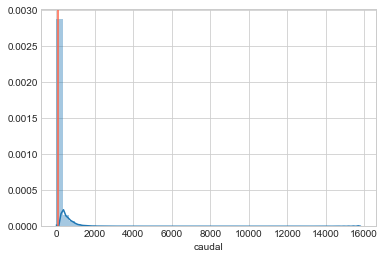

In [15]:
# La mayoría de los datos se encuentran cercanos a 0. El rango de los datos es amplio (Hasta 16000).
sns.distplot(df['caudal'])
plt.axvline(np.mean(df['caudal']), color='tomato')

### 2.2.2.- Precipitaciones promedio máxima:

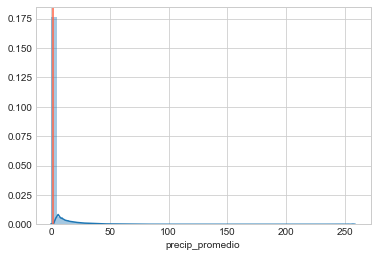

In [16]:
# Tiene un comportamiento similar a caudal pero en otra escala de valores.
sns.distplot(df['precip_promedio'])
plt.axvline(np.mean(df['precip_promedio']), color='tomato')

### 2.2.3.- Temperatura promedio máxima:

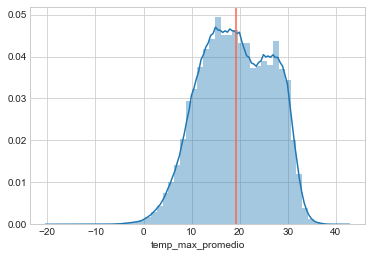

In [17]:
# los valores de la ditribución de la temperatura son plausibles.
sns.distplot(df['temp_max_promedio'].dropna())
plt.axvline(np.mean(df['temp_max_promedio']), color='tomato')

### 2.2.4.- Altura:

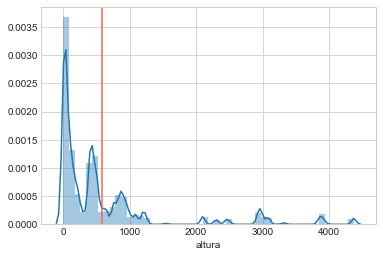

In [18]:
# se observa una distribución multimodal de la altura con varias concentraciones de datos.
sns.distplot(df['altura'].dropna())
plt.axvline(np.mean(df['altura']), color='tomato')

### 2.2.4.- Número de mediciones por estación y cuenca:

In [19]:
# El número de estaciones y mediciones es diferente por cuenca. Hay cuencas con una estacion y otras con mas de 15.
df.groupby('codigo_cuenca')['gauge_id'].value_counts().unique

<bound method Series.unique of codigo_cuenca  gauge_id
10             1020003     11141
               1050004     10409
               1021001      9534
12             1211001      7048
21             2105002     13486
               2105001     13185
               2104002     12820
               2104003      9091
               2120001      7981
               2105007      7866
               2105005      2987
               2103003      2563
32             2110004     13869
               2110002      8728
               2112007      6868
               2110001      6194
               2112006      4586
               2112005      3768
               2110031      1895
34             3430001     16365
               3453001     15524
               3431001     15327
               3450001      5865
               3430002      5789
               3434003      5443
38             3806001     15390
               3804002     14987
               3820003     14755
               382000

In [20]:
df.groupby('gauge_id')['codigo_cuenca'].unique().value_counts() #número de estaciones por cuenca

[83]     15
[73]     11
[45]      8
[21]      8
[57]      8
[38]      7
[113]     7
[32]      7
[47]      7
[81]      6
[34]      6
[43]      5
[115]     4
[54]      4
[91]      4
[10]      3
[122]     3
[60]      3
[111]     3
[71]      2
[94]      2
[103]     2
[117]     2
[12]      1
[110]     1
[104]     1
[52]      1
[107]     1
[128]     1
Name: codigo_cuenca, dtype: int64

In [21]:
len(df['codigo_cuenca'].unique()) #son 29 cuencas

29

## 3- Plots de precipitación, temperatura y caudal
## a. Escribir una función que tome como input una estación y haga plot de los datos para una columna. Debiese tener estos argumentos: def time_plot_una_estacion(codigo_estacion, columna, fecha_min,
fecha_max):


In [22]:
def time_plot_una_estacion(columna, fecha_min = '2014-01-01', fecha_max = '2014-12-31', codigo_estacion=9129002):
    
    date_range = df[(df['fecha'] > fecha_min) & (df['fecha'] <= fecha_max)]
    
    sns.lineplot(x=date_range[date_range['codigo_estacion'] == codigo_estacion]['fecha'], 
                 y=date_range[date_range['codigo_estacion'] == codigo_estacion][columna], label = columna)
    plt.xticks(rotation=45, ha='right')
    plt.title(f" Estación: [{codigo_estacion}]")

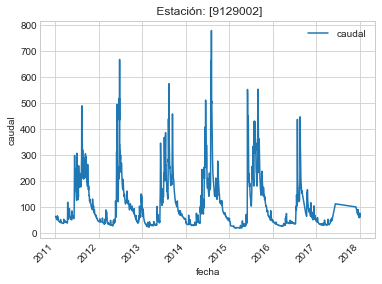

In [23]:
time_plot_una_estacion('caudal', '2011', '2018' )

### b- Ahora escribir una función que haga plots de varias columnas, para poder visualizar caudal, precipitación y temperatura al mismo tiempo. Como las series están en diferentes escalas, sugerimos normalizarlas antes de hacer el plot (por ejemplo, dividiendo por la primera observación de cada seria)
### def time_plot_estaciones_varias_columnas(codigo_estacion, columnas, fecha_min, fecha_max):


In [24]:
def time_plot_estaciones_varias_columnas(columnas, fecha_min = '2014-01-01', fecha_max = '2014-12-31', codigo_estacion = 9129002):
          
    data_range = df[(df['fecha'] > fecha_min) & (df['fecha'] <= fecha_max)]
     
    for index, value in enumerate(columnas):
        
        data_range[columnas[index]] = (data_range[columnas[index]]- data_range[columnas[index]].mean() )/ np.std(data_range[columnas[index]])
        
        sns.lineplot(x=data_range[data_range['codigo_estacion'] == codigo_estacion]['fecha'], 
                     y=data_range[data_range['codigo_estacion'] == codigo_estacion][columnas[index]], label = columnas[index])
        
        plt.xticks(rotation=45, ha='right')           
        plt.style.use('seaborn')
        plt.rcParams['figure.figsize']= (16, 10)
        plt.title(f" Estación: [{codigo_estacion}: Variable normalizadas]")
                   

In [25]:
variables = ['caudal', 'precip_promedio', 'temp_max_promedio' ]

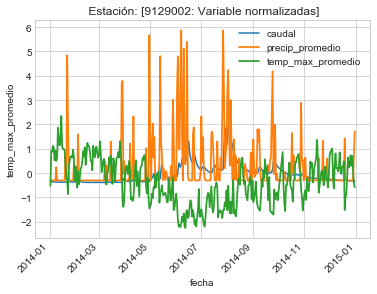

In [26]:
time_plot_estaciones_varias_columnas(variables)

### 4- Crea tres variables llamadas
● caudal_extremo
● temp_extremo
● precip_extremo
Dichas variables toman valor 1 un día si el caudal/temperatura/precipitación (según sea el caso)
observado ese día es extremo. Esto significa que es mayor de lo "esperado". Para capturar esta idea,
el valor de caudal, por ejemplo, toma valor 1 si está sobre el percentil 95 de ese caudal para esa
estación del año (Verano, Primavera, Otoño, Invierno). Toma valor 0 cuando está bajo ese percentil.
En otras palabras, para cada estación de medición y para cada estación del año, debes considerar la
distribución histórica de caudal/temperatura/precipitación para elegir ese percentil 95.
Esta medida toma en cuenta la estacionalidad, pues, por ejemplo, una temperatura de 25 grados en
invierno puede ser extrema, pero en verano es normal. También toma en cuenta que cada cuenca (o
estación) es diferente. Lo que es extremo para una cuenca no lo es para la otra.
¿Les parece razonable esta medida para capturar algo “extremo”? ¿Usarían otra? ¿Cuál? (Solamente
descríbanla, no la codifiquen! Vamos a usar la definición de Spike para esta desafío)

In [27]:
#https://stackoverflow.com/questions/44526662/group-data-by-season-according-to-the-exact-dates
bins = [0, 91, 183, 275, 366]#cortes de número de días por estación
labels=['Verano', 'Otoño', 'Invierno', 'Primavera']
doy = df['fecha'].dt.dayofyear #transforma el formato fecha a un integer con números del 1 al 366 (considera año biciesto)
df['estacion_año'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels) 

In [28]:
doy

32         231
33         248
34         279
35         288
36         355
37          35
38          82
39         101
40         210
41         232
42          74
43         119
44         125
45         177
46          11
47          55
48          59
49          91
50         104
51         141
52         163
53          89
54          75
55         110
56         129
57         140
58         170
59         189
60         221
61          39
          ... 
1411150    272
1411151    351
1411152    113
1411153    192
1411154    223
1411155    157
1411156    280
1411157    305
1411158    308
1411159    327
1411160    332
1411161      4
1411162     31
1411163     53
1411164    157
1411165    244
1411166    250
1411167    258
1411168    282
1411169    288
1411170    298
1411171     75
1411172    158
1411173    165
1411174    267
1411175    283
1411176    287
1411177      4
1411178     29
1411179     42
Name: fecha, Length: 1256478, dtype: int64

In [29]:
df["feature_extrem"]= df["nombre"].astype(str)+ "-" +df["estacion_año"].astype(str)

In [30]:
df["feature_extrem"]=df["feature_extrem"].astype('category')
df["estacion_año"]=df["estacion_año"].astype("category")

In [31]:
caudal_95=df.groupby('feature_extrem')['caudal'].quantile(0.95)
df_extr_1=pd.DataFrame(({'caudal_95': caudal_95}) )

temp_95=df.groupby('feature_extrem')['temp_max_promedio'].quantile(0.95)
df_extr_2=pd.DataFrame(({'temp_95': temp_95}) )

precip_95=df.groupby('feature_extrem')['precip_promedio'].quantile(0.95)
df_extr_3=pd.DataFrame(({'precip_95': precip_95}) )

In [32]:
df = pd.merge(df, df_extr_1, left_on="feature_extrem", right_index=True)
df = pd.merge(df, df_extr_2, left_on="feature_extrem", right_index=True)
df = pd.merge(df, df_extr_3, left_on="feature_extrem", right_index=True)

In [33]:
df["caudal_extremo"]= np.where(df["caudal"]>df["caudal_95"],1,0)
df["temp_extremo"]= np.where(df["temp_max_promedio"]>df["temp_95"],1,0)
df["precip_extremo"]= np.where(df["precip_promedio"]>df["precip_95"],1,0)

In [34]:
df.head()

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,...,mes,semana,estacion_año,feature_extrem,caudal_95,temp_95,precip_95,caudal_extremo,temp_extremo,precip_extremo
32,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,8,33,Invierno,Rio Grande En Paloma 1-Invierno,26.16,26.678,7.471111,1,0,0
33,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,9,35,Invierno,Rio Grande En Paloma 1-Invierno,26.16,26.678,7.471111,1,0,0
40,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,7,30,Invierno,Rio Grande En Paloma 1-Invierno,26.16,26.678,7.471111,0,0,0
41,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,8,33,Invierno,Rio Grande En Paloma 1-Invierno,26.16,26.678,7.471111,0,0,0
45,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.050003,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,...,6,26,Invierno,Rio Grande En Paloma 1-Invierno,26.16,26.678,7.471111,0,0,0


In [35]:
df['caudal_extremo'].value_counts()

0    1193851
1      62627
Name: caudal_extremo, dtype: int64

In [36]:
df['temp_extremo'].value_counts()

0    1195501
1      60977
Name: temp_extremo, dtype: int64

In [37]:
df['precip_extremo'].value_counts()

0    1201502
1      54976
Name: precip_extremo, dtype: int64

# ¿Les parece razonable esta medida para capturar algo “extremo”? ¿Usarían otra? ¿Cuál? (Solamente descríbanla, no la codifiquen! Vamos a usar la definición de Spike para esta desafío)

#### SI ME PARECE RAZONABLE. POR OTRO LADO, PENSARÍA EN INCORPORAR A LAS VARIABLES EXTREMAS EL TIEMPO EN HORAS O DÍAS, PARA DAR CUENTA DE LA DURACIÓN DE LAS TEMPERATURAS Y PRECIPITACIONES EXTREMAS. POR EJ: DAR CUENTA QUE HAN PASADO TRES DÍAS SEGUIDOS CON PRECIPITACIONES EXTREMAS.


# 5. Analicen la variable caudal_extremo. Los comportamientos en diferentes cuencas son muy diferentes?

In [38]:
a=df.groupby('codigo_cuenca')['caudal_extremo'].sum().sort_values()
df_caudal_extremo=pd.DataFrame(({'Total caudal extremo por cuenca': a}) )
df_caudal_extremo

,Total caudal extremo por cuenca
codigo_cuenca,
128,75
107,193
110,308
104,325
117,347
12,351
52,542
60,557
103,751


In [39]:
df_caudal_extremo.mean().round(1)

Total caudal extremo por cuenca    2159.6
dtype: float64

In [40]:
df_caudal_extremo.std().round(1)

Total caudal extremo por cuenca    1742.5
dtype: float64

#### El número de eventos de caudal extremo tiene un promedio de 2159.6 considerando todos los años.
#### La desviación estándar es de 1742.5.

## 6- Hagan un plot del porcentaje de eventos extremos a través del tiempo (caudal_extremo, temp_extremo, precip_extremo). Se han vuelto más o menos comunes?


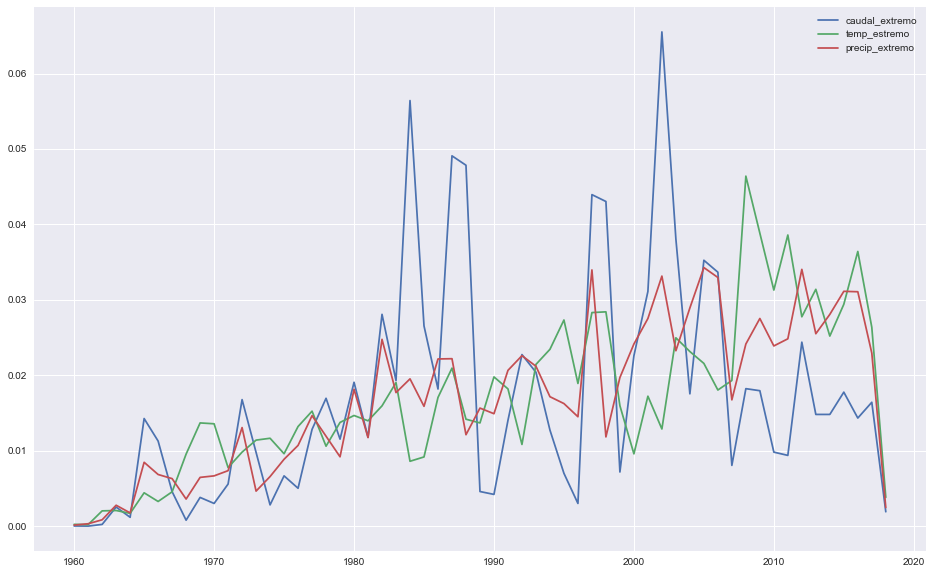

In [41]:
b_1=df.groupby('año')['caudal_extremo'].sum()/62627 #TOTAL DE CAUDALES EXTREMOS EN TODOS LOS AÑOS
b_2=df.groupby('año')['temp_extremo'].sum()/60977 #TOTAL DE TEMP_EXTREMA EN TODOS LOS MESES
b_3=df.groupby('año')['precip_extremo'].sum()/54976 #TOTAL PRECIP_EXTREMAS EN TODOS LOS AÑOS
plt.plot(b_1, label="caudal_extremo")
plt.plot(b_2, label="temp_estremo")
plt.plot(b_3, label="precip_extremo")
leg_1= plt.legend()


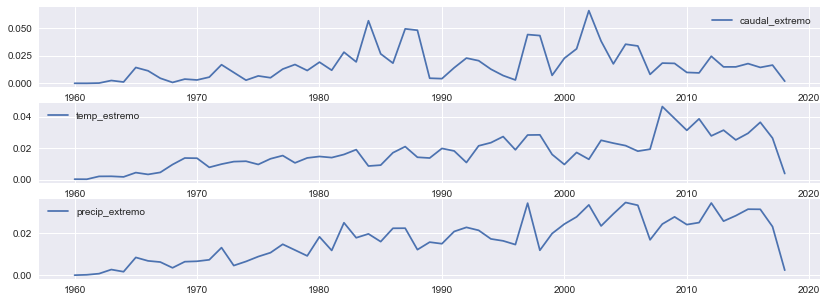

In [42]:
f, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(14,5))
b_1=df.groupby('año')['caudal_extremo'].sum()/62627 #TOTAL DE CAUDALES EXTREMOS EN TODOS LOS AÑOS
b_2=df.groupby('año')['temp_extremo'].sum()/60977 #TOTAL DE TEMP_EXTREMA EN TODOS LOS MESES
b_3=df.groupby('año')['precip_extremo'].sum()/54976 #TOTAL PRECIP_EXTREMAS EN TODOS LOS AÑOS
ax1.plot(b_1, label="caudal_extremo")
ax2.plot(b_2, label="temp_estremo")
ax3.plot(b_3, label="precip_extremo")
leg_1= ax1.legend()
leg_2= ax2.legend()
leg_3= ax3.legend()

#DESCRIPTIVAMENTE LAS TRES VARIABLES HAN AUMENTADO CONSIDERANDO TODOS LOS AÑOS


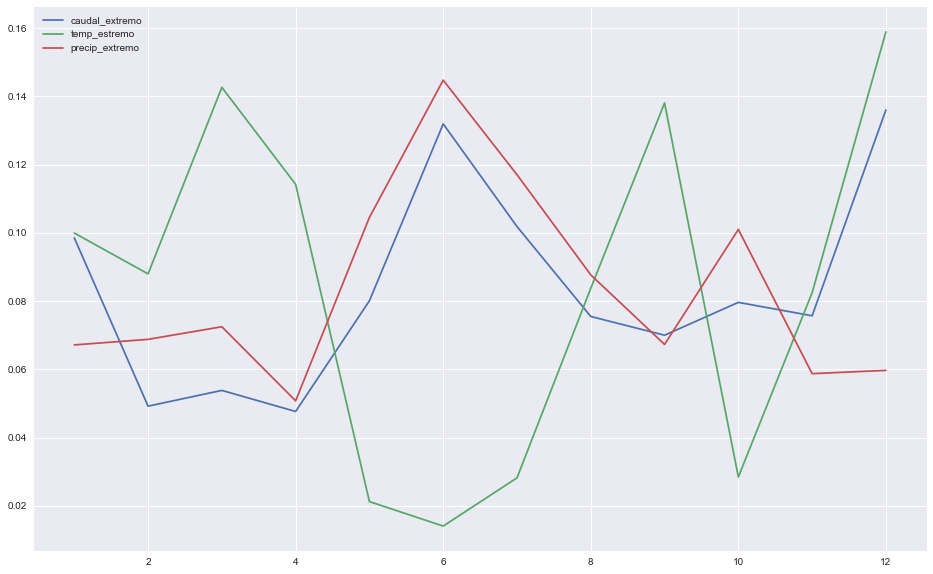

In [43]:
c_1=df.groupby('mes')['caudal_extremo'].sum()/62627
c_2=df.groupby('mes')['temp_extremo'].sum()/60977
c_3=df.groupby('mes')['precip_extremo'].sum()/54976
plt.plot(c_1, label="caudal_extremo")
plt.plot(c_2, label="temp_estremo")
plt.plot(c_3, label="precip_extremo")
leg_1= plt.legend()
#MUY INTERESANTE: EN VERANO AL PARECER LOS EVENTOS DE CAUDAL EXTREMO SE CORRELACIONAN CON TEMP.EXTREMA Y EN INVIERNO CON PRECIPITACIONES EXTREMAS.

# 7 Predicción de caudal extremo. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de un caudal extremo (la variable binariacaudal_extremo). Siéntete libre de generar variables adicionales y/o complementar con variables externas.
¿Qué datos podemos usar y cuáles no? Por supuesto, no podemos usar datos del futuro, pero
¿es lícito usar información del mismo día? ¿del día anterior? Todo depende de cómo
propongas que el modelo se puede usar. Haz una propuesta de cómo usar tu modelo en la
práctica (por ejemplo: una vez entrenado, voy a tomar los datos de XXX hasta el lunes y
predecir para el día siguiente). Dada la propuesta, declara restricciones de información para
caudal, temperatura y precipitación

In [48]:
#TRANSFORMACIÓN DE ESTACIONES DEL AÑO A DUMMY
bins = [0, 91, 183, 275, 366]#cortes de número de días por estación
labels=[0, 1, 2, 3]
doy = df['fecha'].dt.dayofyear #transforma el formato fecha a un integer con números del 1 al 366 (considera año biciesto)
df['cod_estacion'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels) 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256478 entries, 32 to 1411173
Data columns (total 28 columns):
codigo_estacion           1256478 non-null int64
institucion               1256478 non-null object
fuente                    1256478 non-null object
nombre                    1256478 non-null object
altura                    1256478 non-null int64
latitud                   1256478 non-null float64
longitud                  1256478 non-null float64
codigo_cuenca             1256478 non-null int64
nombre_sub_cuenca         1256478 non-null object
cantidad_observaciones    1256478 non-null int64
fecha                     1256478 non-null datetime64[ns, UTC]
caudal                    1256478 non-null float64
gauge_id                  1256478 non-null int64
gauge_name                1256478 non-null object
precip_promedio           1256478 non-null float64
temp_max_promedio         1256478 non-null float64
año                       1256478 non-null int64
mes                     

In [49]:
df["mes"]=df["mes"].astype('category')
df["cod_estacion"]=df["cod_estacion"].astype('category')
df["temp_extremo"]=df["temp_extremo"].astype('category')
df["precip_extremo"]=df["precip_extremo"].astype('category')


In [51]:
#MODELO SATURADO
m1_logit= smf.logit("caudal_extremo ~ altura + codigo_estacion + codigo_cuenca + cod_estacion + temp_extremo + precip_extremo+ mes",df).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.192913
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         caudal_extremo   No. Observations:              1256478
Model:                          Logit   Df Residuals:                  1256458
Method:                           MLE   Df Model:                           19
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                 0.02596
Time:                        21:23:38   Log-Likelihood:            -2.4239e+05
converged:                       True   LL-Null:                   -2.4885e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.8076      0.019   -148.924      0.000      -2.845      -2.771
cod_estacion[T.1]       0.0445      0.030      1.485      0.138      -0.014       0.103
cod_estacion[T.2]      -0.5743      0.031    -18.689      0.000      -0.635      -0.514
cod_estacion[T.3]      -0.5985      0.021    -28.142      0.000      -0.640      -0.557
temp_extremo[T.1]      -0.4280      0.024    -17.489      0.000      -0.476      -0.380
precip_extremo[T.1]     1.0227      0.014     74.051      0.000       0.996       1.050
mes[T.2]               -0.6353      0.023    -28.162      0.000      -0.680      -0.591
mes[T.3]               -0.6355      0.024    -26.525      0.000      -0.682      -0.589
mes[T.4]               -0.7373      0.038    -19.598      0.000      -0.811      -0.664
mes[T.5]               -0.3027      0.036     -8.439      0.000      -0.373      -0.232
mes[T.6]                0.3830      0.033     11.467      0.000       0.318       0.448
mes[T.7]                0.5736      0.036     15.963      0.000       0.503       0.644
mes[T.8]                0.2823      0.037      7.709      0.000       0.211       0.354
mes[T.9]                0.2660      0.032      8.313      0.000       0.203       0.329
mes[T.10]               0.3306      0.029     11.415      0.000       0.274       0.387
mes[T.11]               0.3547      0.029     12.184      0.000       0.298       0.412
mes[T.12]               0.7331      0.021     35.055      0.000       0.692       0.774
altura              -4.362e-06   5.88e-06     -0.742      0.458   -1.59e-05    7.16e-06
codigo_estacion      3.492e-09   1.04e-08      0.336      0.737   -1.69e-08    2.39e-08
codigo_cuenca          -0.0007      0.001     -0.656      0.512      -0.003       0.001
=======================================================================================
"""

In [52]:
#modelo depurado
m1_logit_dep= smf.logit("caudal_extremo ~ cod_estacion + mes + temp_extremo+ precip_extremo",df).fit()
m1_logit_dep.summary()

Optimization terminated successfully.
         Current function value: 0.192914
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         caudal_extremo   No. Observations:              1256478
Model:                          Logit   Df Residuals:                  1256461
Method:                           MLE   Df Model:                           16
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                 0.02595
Time:                        21:23:52   Log-Likelihood:            -2.4239e+05
converged:                       True   LL-Null:                   -2.4885e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.8309      0.013   -214.109      0.000      -2.857      -2.805
cod_estacion[T.1]       0.0447      0.030      1.492      0.136      -0.014       0.103
cod_estacion[T.2]      -0.5742      0.031    -18.687      0.000      -0.634      -0.514
cod_estacion[T.3]      -0.5984      0.021    -28.138      0.000      -0.640      -0.557
mes[T.2]               -0.6353      0.023    -28.159      0.000      -0.679      -0.591
mes[T.3]               -0.6355      0.024    -26.527      0.000      -0.682      -0.589
mes[T.4]               -0.7375      0.038    -19.605      0.000      -0.811      -0.664
mes[T.5]               -0.3029      0.036     -8.445      0.000      -0.373      -0.233
mes[T.6]                0.3829      0.033     11.464      0.000       0.317       0.448
mes[T.7]                0.5736      0.036     15.966      0.000       0.503       0.644
mes[T.8]                0.2823      0.037      7.709      0.000       0.211       0.354
mes[T.9]                0.2661      0.032      8.314      0.000       0.203       0.329
mes[T.10]               0.3305      0.029     11.412      0.000       0.274       0.387
mes[T.11]               0.3545      0.029     12.178      0.000       0.297       0.412
mes[T.12]               0.7330      0.021     35.049      0.000       0.692       0.774
temp_extremo[T.1]      -0.4280      0.024    -17.489      0.000      -0.476      -0.380
precip_extremo[T.1]     1.0217      0.014     74.037      0.000       0.995       1.049
=======================================================================================
"""

In [66]:
X_train=df[(df['año'] >= 1960) & (df['año'] <= 2001)]
X_test= df[(df['año'] > 2001) & (df['año'] <= 2020)]
y_train= df[(df['año'] >= 1960) & (df['año'] <= 2001)]
y_test= df[(df['año'] > 2001) & (df['año'] <= 2020)]

In [67]:
X_train= X_train.loc[:,["mes", "temp_extremo", "precip_extremo", "cod_estacion"]]
X_test= X_test.loc[:,["mes", "temp_extremo", "precip_extremo", "cod_estacion"]]
y_train= y_train["caudal_extremo"]
y_test= y_test["caudal_extremo"]

In [68]:
X_train_std= StandardScaler().fit_transform(X_train)
X_test_std= StandardScaler().fit_transform(X_test)

In [69]:
default_model= LogisticRegression().fit(X_train_std, y_train)

In [70]:
default_model.coef_

array([[ 0.30910184, -0.06949115,  0.21681779, -0.23872979]])

In [71]:
default_model.intercept_

array([-2.86691733])

In [72]:
yhat = default_model.predict(X_test_std)
yhat[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
yhat_pr = default_model.predict_proba(X_test_std)
yhat_pr[:20]

array([[0.95070179, 0.04929821],
       [0.95070179, 0.04929821],
       [0.9463358 , 0.0536642 ],
       [0.9416069 , 0.0583931 ],
       [0.95472956, 0.04527044],
       [0.9463358 , 0.0536642 ],
       [0.9463358 , 0.0536642 ],
       [0.9463358 , 0.0536642 ],
       [0.9463358 , 0.0536642 ],
       [0.9463358 , 0.0536642 ],
       [0.9416069 , 0.0583931 ],
       [0.9463358 , 0.0536642 ],
       [0.95070179, 0.04929821],
       [0.86157852, 0.13842148],
       [0.9416069 , 0.0583931 ],
       [0.95472956, 0.04527044],
       [0.9416069 , 0.0583931 ],
       [0.9416069 , 0.0583931 ],
       [0.87190678, 0.12809322],
       [0.96023246, 0.03976754]])

In [74]:
m1_confussion= confusion_matrix(y_test, yhat)
m1_confussion

array([[516137,      0],
       [ 22406,      0]], dtype=int64)

In [75]:
print(classification_report(y_test, yhat));

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    516137
           1       0.00      0.00      0.00     22406

    accuracy                           0.96    538543
   macro avg       0.48      0.50      0.49    538543
weighted avg       0.92      0.96      0.94    538543



In [76]:
yhat_pr= default_model.predict_proba(X_test_std)[:,1]
false_positive, true_positive, threshold= roc_curve(y_test, yhat_pr)

Text(0.5, 0, 'Falsos positivos')

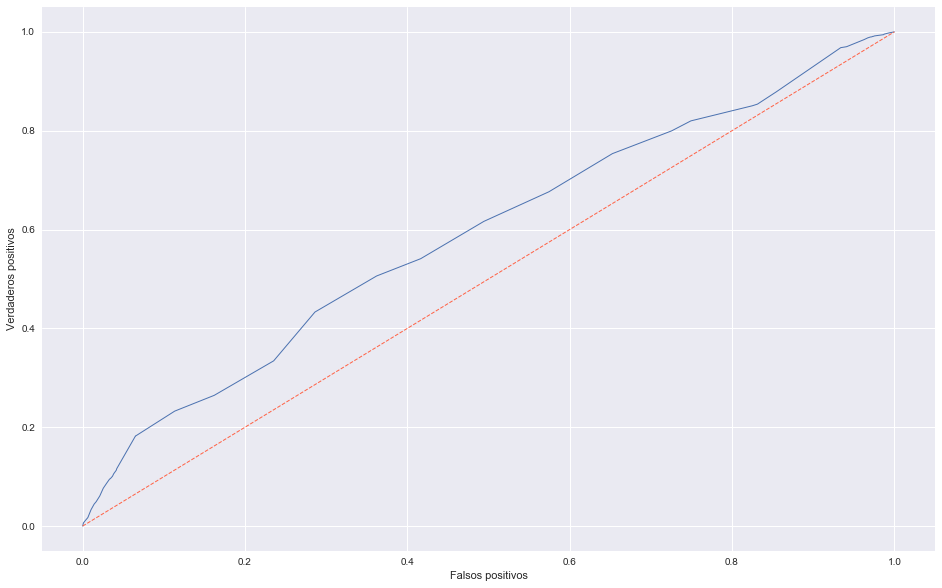

In [77]:
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0,1], linestyle="--", lw=1, color="tomato")
plt.ylabel("Verdaderos positivos")
plt.xlabel("Falsos positivos")

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,yhat_pr)
# El modelo explica en un 8,94 %

0.5894279104640633

## los datos a usar son: mes, temp_extremo, precip_extremo, cod_estacion(clima). La temp_extremo y precip_extremo considera el percentil 95 en el estación climatica histórica.
## Es lícito usar la información de un día mientras se contraste con la información historica.
## Usaría el modelo con la información diaria.

## Sin embargo, es necesario seguir trabajando el modelo propuesto. Probar otro algoritmo e incorporar nuevas variables. El modelo como está no predice los casos de caudal_extremo.

# 8-Análisis de resultado del modelo
a. Qué performance tiene el modelo? Qué métricas usaste para medir esa performance?
Cuáles son las variables más importantes? Qué opinión te merecen los resultados?
b. Si quisiéramos capturar alrededor de un 70% de los eventos de caudales extremos.
Cuál es la precisión de tu modelo con ese porcentaje de captura? Cuéntanos si te
parece útil.


# Qué performance tiene el modelo?
### El modelo predice superios en un 8,94 % a la predicción base de un 50% (azar)

# Qué métricas usaste para medir esa performance?
### curva roc, accuracy y f1. La curva roc grafica x=1-especificidad versus y= sensibilidad. 

# Cuáles son las variables más importantes?
### mes, temp_extremo, precip_extremo, cod_estacion(clima).

# Qué opinión te merecen los resultados?
### no me parecen satisfactorios los resultados. Es necesario crear nuevos features y modelar con otros algoritmos.

# Si quisiéramos capturar alrededor de un 70% de los eventos de caudales extremos.
### presicion= 0